In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 生成数据集并展示

In [26]:
n_train, n_test, num_inputs = 7000, 3000, 500
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 2 读取数据

In [27]:
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0)

In [28]:
for X, y in train_iter:
    print(X, y)
    break

tensor([[ 2.0150e+00, -1.6351e-01, -1.3619e+00,  ..., -2.8575e-01,
         -8.3001e-03, -1.1773e+00],
        [ 1.3856e+00,  1.0419e+00, -1.8406e-02,  ...,  1.1600e+00,
         -1.4812e-01,  1.7696e+00],
        [-1.9048e-01, -4.7711e-01, -5.4448e-01,  ...,  4.0112e-01,
         -1.0457e+00, -6.4393e-01],
        ...,
        [-3.4854e-01,  3.6485e-01, -4.2041e-01,  ..., -2.8127e-02,
         -8.4963e-01,  3.7745e-01],
        [-1.3660e+00, -9.4598e-04, -2.9372e-01,  ...,  5.5287e-01,
          1.8989e-01,  4.1841e-01],
        [ 1.0960e+00, -3.5533e-01, -6.1283e-01,  ...,  9.8984e-01,
         -1.9250e-01,  1.0564e+00]]) tensor([[-0.1470],
        [-0.0665],
        [-0.0314],
        [ 0.1114],
        [-0.0375],
        [ 0.0908],
        [ 0.0347],
        [ 0.1221],
        [-0.1424],
        [-0.1028],
        [ 0.1418],
        [ 0.0251],
        [ 0.1980],
        [-0.0520],
        [ 0.0777],
        [ 0.0734],
        [-0.0240],
        [-0.0672],
        [-0.0845],
       

## 3 初始化模型参数

In [29]:
num_inputs, num_outputs = 500, 1

w = torch.randn((num_inputs, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
params = [w, b]

## 4 定义模型

In [30]:
def net(X):
    return torch.mm(X, w) + b

## 5 定义损失函数

In [31]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

loss = torch.nn.L1Loss()

## 6 定义优化算法

In [32]:
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

## 7 定义loss画图函数

In [33]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 8 训练模型

In [34]:
def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            # 反向传播 + 更新优化参数
            l.backward()
            if optimizer == None:
                SGD(params, lr)
            else:
                optimizer.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
        print(train_ls[-1], test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w', w.norm().item())

0.01871086284518242 0.018387233838438988
0.01870669797062874 0.018540551885962486
0.018087241798639297 0.018070468679070473
0.017920952290296555 0.018078060820698738
0.018349625170230865 0.018404096364974976
L2 norm of w 0.12706319987773895


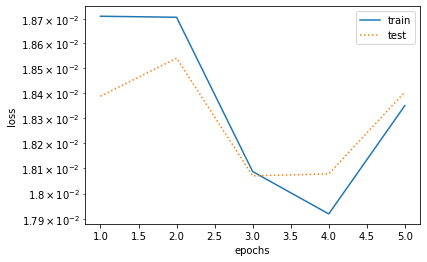

In [36]:
num_epochs = 5
lr = 0.003
train(net, train_iter, test_iter, squared_loss, num_epochs, batch_size, params, lr)